<h1 style= "color:#9370DB;"> Stock Market Analysis </h1>

<h1 style="color: #9370DB;">Stock Analysis</h1> <!-- Soft Lavender -->
<h2 style="color: #4C9F70;">01 | Data Extraction</h2> <!-- Muted Blue -->
<h3 style="color: #4682B4;">1.1 | Exploring the Data</h3> <!-- Steel Blue -->
<h4 style="color: #D2691E;">4.2.1 | Selecting Model: Linear Regression</h4> <!-- Rust Orange -->
<h5 style="color: #DAA520;">4.3 | Model Training</h5> <!-- Golden Sand -->

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# New liabraries. 
import scipy.stats as st

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

/opt/anaconda3/envs/streamlit-stock/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2 style="color: #4C9F70;"> 01 | Data Extraction </h2>

In [2]:
price_df = pd.read_csv('plan_kaggle/sp500_stocks.csv')
price_sp = pd.read_csv('plan_kaggle/sp500_index.csv')
annual_returns = pd.read_csv('plan_kaggle/annual_returns.csv')
info_df = pd.read_csv('plan_yahoo/extrainfo.csv')
data = pd.read_csv('plan_yahoo/info_0_500.csv')

In [3]:
# Cleaning columns with snake_case 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] 
info_df.columns = [col.lower().replace(" ", "_")for col in info_df.columns] 

<h3 style="color: #4682B4;">1.1 | Exploring the Data </h3>

In [4]:
annual_returns.sample(3)

,Unnamed: 0,symbol,year,annual_return
2039,2733,FITB,2014,0.0002
3556,4747,NEE,2014,0.3000
4476,5967,SPG,2023,0.2918


In [5]:
info_df.sample(3)

,unnamed:_0,currency,symbol,exchangename,fullexchangename,instrumenttype,firsttradedate,regularmarkettime,hasprepostmarketdata,gmtoffset,...,regularmarketprice,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,regularmarketdaylow,regularmarketvolume,longname,shortname,chartpreviousclose,pricehint
148,148,USD,DOV,NYQ,NYSE,EQUITY,322151400,1738962002,True,-18000,...,202.54,222.31,158.29,204.40,201.330,574960,Dover Corporation,Dover Corporation,1.472,2
78,78,USD,CPT,NYQ,NYSE,EQUITY,743347800,1738962002,True,-18000,...,119.16,127.69,90.50,121.12,117.280,1399924,Camden Property Trust,Camden Property Trust,23.000,2
252,252,USD,INVH,NYQ,NYSE,EQUITY,1485959400,1738962002,True,-18000,...,31.62,37.80,30.13,31.75,31.335,1021553,Invitation Homes Inc.,Invitation Homes Inc.,20.000,2


In [6]:
data.sample(3)

,unnamed:_0.1,unnamed:_0,symbol,address1,city,state,zip,country,phone,website,industry,industrykey,industrydisp,sector,sectorkey,sectordisp,longbusinesssummary,fulltimeemployees,maxage
56,56,56,BALL,9200 West 108th Circle,Westminster,CO,80021,United States,303 469 3131,https://www.ball.com,Packaging & Containers,packaging-containers,Packaging & Containers,Consumer Cyclical,consumer-cyclical,Consumer Cyclical,Ball Corporation supplies aluminum packaging p...,21000.0,86400
290,42,42,LKQ,500 West Madison Street,Chicago,IL,60661,United States,312 621 1950,https://www.lkqcorp.com,Auto Parts,auto-parts,Auto Parts,Consumer Cyclical,consumer-cyclical,Consumer Cyclical,LKQ Corporation engages in the distribution of...,49000.0,86400
241,241,241,IBM,One New Orchard Road,Armonk,NY,10504,United States,914 499 1900,https://www.ibm.com,Information Technology Services,information-technology-services,Information Technology Services,Technology,technology,Technology,"International Business Machines Corporation, t...",282200.0,86400


<h3 style="color: #4682B4;">1.2 | Copies</h3>

In [7]:
df = data.copy()
annual_returns2 = annual_returns.copy()
info_df2 = info_df.copy()

<h2 style="color: #4C9F70;"> 02 | Data Cleaning </h2>

<h3 style="color: #4682B4;"> 2.1 | Dealing with Data types</h3>

In [8]:
df.dtypes

unnamed:_0.1             int64
unnamed:_0               int64
symbol                  object
address1                object
city                    object
state                   object
zip                     object
country                 object
phone                   object
website                 object
industry                object
industrykey             object
industrydisp            object
sector                  object
sectorkey               object
sectordisp              object
longbusinesssummary     object
fulltimeemployees      float64
maxage                   int64
dtype: object

In [9]:
annual_returns2.dtypes

Unnamed: 0         int64
symbol            object
year               int64
annual_return    float64
dtype: object

In [10]:
info_df2.dtypes

unnamed:_0                int64
currency                 object
symbol                   object
exchangename             object
fullexchangename         object
instrumenttype           object
firsttradedate            int64
regularmarkettime         int64
hasprepostmarketdata       bool
gmtoffset                 int64
timezone                 object
exchangetimezonename     object
regularmarketprice      float64
fiftytwoweekhigh        float64
fiftytwoweeklow         float64
regularmarketdayhigh    float64
regularmarketdaylow     float64
regularmarketvolume       int64
longname                 object
shortname                object
chartpreviousclose      float64
pricehint                 int64
dtype: object

<h3 style="color: #4682B4;"> 2.2 | Dealing with NaN values</h3>

In [11]:
df.isna().sum()

unnamed:_0.1            0
unnamed:_0              0
symbol                  0
address1                0
city                    0
state                  20
zip                     2
country                 0
phone                   0
website                 0
industry                0
industrykey             0
industrydisp            0
sector                  0
sectorkey               0
sectordisp              0
longbusinesssummary     0
fulltimeemployees       8
maxage                  0
dtype: int64

We will take care of the following **NaN** values: 
  
- `state` : Won't be used for our analysis.
-  `zip` : Won't be used for our analysis.

In [12]:
annual_returns2.isna().sum()

Unnamed: 0       0
symbol           0
year             0
annual_return    0
dtype: int64

In [13]:
info_df2.isna().sum()

unnamed:_0              0
currency                0
symbol                  0
exchangename            0
fullexchangename        0
instrumenttype          0
firsttradedate          0
regularmarkettime       0
hasprepostmarketdata    0
gmtoffset               0
timezone                0
exchangetimezonename    0
regularmarketprice      0
fiftytwoweekhigh        0
fiftytwoweeklow         0
regularmarketdayhigh    0
regularmarketdaylow     0
regularmarketvolume     0
longname                0
shortname               0
chartpreviousclose      0
pricehint               0
dtype: int64

<h3 style="color: #4682B4;"> 2.3 | Dealing with Duplicates</h3>

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
info_df2.duplicated().sum()

np.int64(0)

In [16]:
annual_returns2.duplicated().sum()

np.int64(0)

<h3 style="color: #4682B4;"> 2.4 | Dealing with columns </h3

In [17]:
df.head()

,unnamed:_0.1,unnamed:_0,symbol,address1,city,state,zip,country,phone,website,industry,industrykey,industrydisp,sector,sectorkey,sectordisp,longbusinesssummary,fulltimeemployees,maxage
0,0,0,MMM,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,conglomerates,Conglomerates,Industrials,industrials,Industrials,3M Company provides diversified technology ser...,85000.0,86400
1,1,1,AOS,11270 West Park Place,Milwaukee,WI,53224-9508,United States,414 359 4000,https://www.aosmith.com,Specialty Industrial Machinery,specialty-industrial-machinery,Specialty Industrial Machinery,Industrials,industrials,Industrials,A. O. Smith Corporation manufactures and marke...,12000.0,86400
2,2,2,ABT,100 Abbott Park Road,North Chicago,IL,60064-6400,United States,224 667 6100,https://www.abbott.com,Medical Devices,medical-devices,Medical Devices,Healthcare,healthcare,Healthcare,"Abbott Laboratories, together with its subsidi...",114000.0,86400
3,3,3,ABBV,1 North Waukegan Road,North Chicago,IL,60064-6400,United States,847 932 7900,https://www.abbvie.com,Drug Manufacturers - General,drug-manufacturers-general,Drug Manufacturers - General,Healthcare,healthcare,Healthcare,"AbbVie Inc. discovers, develops, manufactures,...",50000.0,86400
4,4,4,ACN,1 Grand Canal Square,Dublin,NaN,D02 P820,Ireland,353 1 646 2000,https://www.accenture.com,Information Technology Services,information-technology-services,Information Technology Services,Technology,technology,Technology,Accenture plc provides strategy and consulting...,774000.0,86400


In [ ]:
# Delete Columns 
df.drop(columns=['unnamed:_0.1', 'unnamed:_0', 'industrykey','industrydisp','sectorkey', 'sectordisp','maxage',
                 'state','zip','country','phone'], inplace=True)
info_df2.drop(columns=['unnamed:_0', 'currency', 'instrumenttype','firsttradedate',
                       'hasprepostmarketdata', 'gmtoffset', 'timezone','longname','regularmarkettime',
                       'exchangetimezonename', 'regularmarketdaylow','regularmarketvolume','chartpreviousclose','pricehint'], inplace=True)
annual_returns2.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
info_df2

,symbol,exchangename,fullexchangename,regularmarkettime,regularmarketprice,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,shortname
0,MMM,NYQ,NYSE,1738962002,149.870,155.00,75.652,152.900,3M Company
1,AOS,NYQ,NYSE,1738962002,65.160,92.45,64.940,66.210,A.O. Smith Corporation
2,ABT,NYQ,NYSE,1738962002,129.070,132.50,99.710,129.490,Abbott Laboratories
3,ABBV,NYQ,NYSE,1738962002,190.600,207.32,153.580,193.860,AbbVie Inc.
4,ACN,NYQ,NYSE,1738962002,385.980,398.35,278.690,390.530,Accenture plc
...,...,...,...,...,...,...,...,...,...
463,XYL,NYQ,NYSE,1739198273,131.295,146.08,113.260,131.945,Xylem Inc.
464,YUM,NYQ,NYSE,1739198310,144.305,144.96,122.130,144.960,"Yum! Brands, Inc."
465,ZBRA,NMS,NasdaqGS,1739198246,362.270,427.76,243.490,365.430,Zebra Technologies Corporation
466,ZBH,NYQ,NYSE,1739198320,100.700,133.90,99.930,101.570,"Zimmer Biomet Holdings, Inc."


In [20]:
df

,symbol,address1,city,website,industry,sector,longbusinesssummary,fulltimeemployees
0,MMM,3M Center,Saint Paul,https://www.3m.com,Conglomerates,Industrials,3M Company provides diversified technology ser...,85000.0
1,AOS,11270 West Park Place,Milwaukee,https://www.aosmith.com,Specialty Industrial Machinery,Industrials,A. O. Smith Corporation manufactures and marke...,12000.0
2,ABT,100 Abbott Park Road,North Chicago,https://www.abbott.com,Medical Devices,Healthcare,"Abbott Laboratories, together with its subsidi...",114000.0
3,ABBV,1 North Waukegan Road,North Chicago,https://www.abbvie.com,Drug Manufacturers - General,Healthcare,"AbbVie Inc. discovers, develops, manufactures,...",50000.0
4,ACN,1 Grand Canal Square,Dublin,https://www.accenture.com,Information Technology Services,Technology,Accenture plc provides strategy and consulting...,774000.0
...,...,...,...,...,...,...,...,...
496,XYL,300 Water Street SE,Washington,https://www.xylem.com,Specialty Industrial Machinery,Industrials,"Xylem Inc., together with its subsidiaries, en...",23000.0
497,YUM,1441 Gardiner Lane,Louisville,https://www.yum.com,Restaurants,Consumer Cyclical,"Yum! Brands, Inc., together with its subsidiar...",35000.0
498,ZBRA,3 Overlook Point,Lincolnshire,https://www.zebra.com,Communication Equipment,Technology,"Zebra Technologies Corporation, together with ...",9750.0
499,ZBH,345 East Main Street,Warsaw,https://www.zimmerbiomet.com,Medical Devices,Healthcare,"Zimmer Biomet Holdings, Inc., together with it...",18000.0


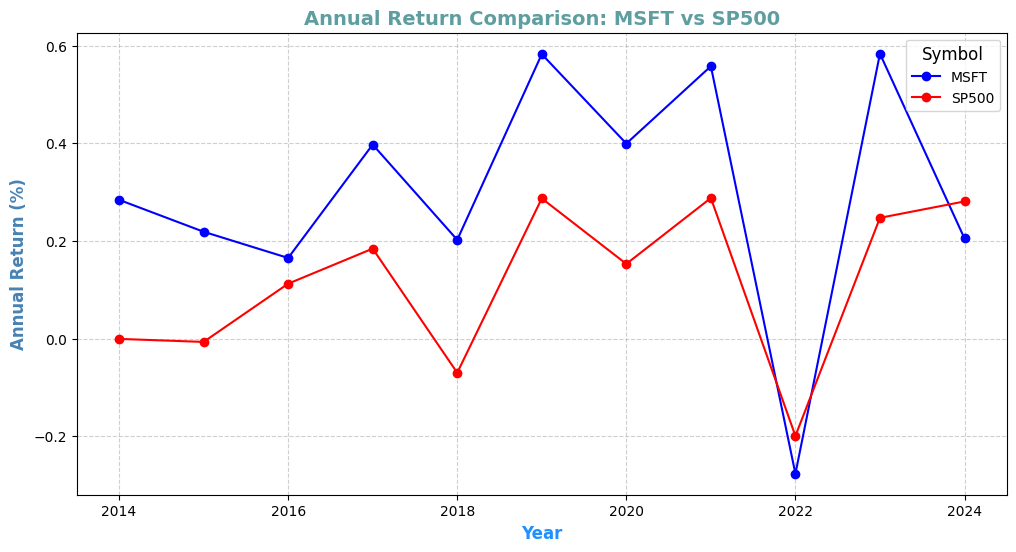

In [23]:
annual_return_plot(annual_returns, 'MSFT')

In [25]:
pivoted_df = annual_returns2.pivot(index='symbol', columns='year', values='annual_return')
pivoted_df

year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
symbol,,,,,,,,,,,
A,0.0254,0.0418,0.1319,0.4535,0.0072,0.3098,0.3875,0.3512,-0.0374,-0.0666,0.0183
AAPL,0.4263,-0.0208,0.1238,0.4804,-0.0705,0.8874,0.7824,0.3806,-0.2820,0.5480,0.3145
ABBV,0.2996,-0.0714,0.1290,0.6061,-0.0267,0.0483,0.2628,0.3461,0.2399,-0.0071,0.1427
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,0.0144,0.1965,-0.5049,0.6035,0.0181
ABT,0.2040,0.0214,-0.0828,0.4954,0.2529,0.2705,0.2791,0.3098,-0.1971,0.0246,0.0733
...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.1300,-0.0260,0.3920,0.3914,-0.0082,0.1997,0.2916,0.2144,-0.0418,0.0459,0.1240
YUM,-0.0097,0.0321,0.2488,0.3134,0.1462,0.1200,0.0830,0.3342,-0.0439,0.0485,0.0879
ZBH,0.2405,-0.0810,0.0227,0.1774,-0.1565,0.4745,0.0413,-0.1650,0.0170,-0.0438,-0.1101


In [26]:
# Unification from annual return from each stock adding the sp500. 
definitive = pd.merge (df, info_df2, on='symbol')
definitive

,symbol,address1,city,website,industry,sector,longbusinesssummary,fulltimeemployees,exchangename,fullexchangename,regularmarkettime,regularmarketprice,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,shortname
0,MMM,3M Center,Saint Paul,https://www.3m.com,Conglomerates,Industrials,3M Company provides diversified technology ser...,85000.0,NYQ,NYSE,1738962002,149.870,155.00,75.652,152.900,3M Company
1,AOS,11270 West Park Place,Milwaukee,https://www.aosmith.com,Specialty Industrial Machinery,Industrials,A. O. Smith Corporation manufactures and marke...,12000.0,NYQ,NYSE,1738962002,65.160,92.45,64.940,66.210,A.O. Smith Corporation
2,ABT,100 Abbott Park Road,North Chicago,https://www.abbott.com,Medical Devices,Healthcare,"Abbott Laboratories, together with its subsidi...",114000.0,NYQ,NYSE,1738962002,129.070,132.50,99.710,129.490,Abbott Laboratories
3,ABBV,1 North Waukegan Road,North Chicago,https://www.abbvie.com,Drug Manufacturers - General,Healthcare,"AbbVie Inc. discovers, develops, manufactures,...",50000.0,NYQ,NYSE,1738962002,190.600,207.32,153.580,193.860,AbbVie Inc.
4,ACN,1 Grand Canal Square,Dublin,https://www.accenture.com,Information Technology Services,Technology,Accenture plc provides strategy and consulting...,774000.0,NYQ,NYSE,1738962002,385.980,398.35,278.690,390.530,Accenture plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,XYL,300 Water Street SE,Washington,https://www.xylem.com,Specialty Industrial Machinery,Industrials,"Xylem Inc., together with its subsidiaries, en...",23000.0,NYQ,NYSE,1739198273,131.295,146.08,113.260,131.945,Xylem Inc.
464,YUM,1441 Gardiner Lane,Louisville,https://www.yum.com,Restaurants,Consumer Cyclical,"Yum! Brands, Inc., together with its subsidiar...",35000.0,NYQ,NYSE,1739198310,144.305,144.96,122.130,144.960,"Yum! Brands, Inc."
465,ZBRA,3 Overlook Point,Lincolnshire,https://www.zebra.com,Communication Equipment,Technology,"Zebra Technologies Corporation, together with ...",9750.0,NMS,NasdaqGS,1739198246,362.270,427.76,243.490,365.430,Zebra Technologies Corporation
466,ZBH,345 East Main Street,Warsaw,https://www.zimmerbiomet.com,Medical Devices,Healthcare,"Zimmer Biomet Holdings, Inc., together with it...",18000.0,NYQ,NYSE,1739198320,100.700,133.90,99.930,101.570,"Zimmer Biomet Holdings, Inc."


In [27]:
definitive.columns

Index(['symbol', 'address1', 'city', 'website', 'industry', 'sector',
       'longbusinesssummary', 'fulltimeemployees', 'exchangename',
       'fullexchangename', 'regularmarkettime', 'regularmarketprice',
       'fiftytwoweekhigh', 'fiftytwoweeklow', 'regularmarketdayhigh',
       'shortname'],
      dtype='object')

<h3 style="color: #4682B4;"> 2.5 | Moving target to the right </h3>

In [ ]:
#Dropping Columns: Exchange, longname, longbusinesssumary. 
cols = ['symbol','shortname','address1', 'city', 'website', 'industry', 'sector',
       'longbusinesssummary', 'fulltimeemployees', 'exchangename',
       'fullexchangename','fiftytwoweekhigh',
       'fiftytwoweeklow', 'regularmarketdayhigh','regularmarketprice']

In [ ]:
definitive = definitive[cols]
definitive.head()

# <h2 style="color: #4C9F70;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4682B4;">3.1 | Descriptive Statistics </h3>

In [36]:
# Selecting categorical columns. 
cat = definitive.select_dtypes(exclude='number')
cat.head(5)

,symbol,shortname,address1,city,website,industry,sector,longbusinesssummary,exchangename,fullexchangename
0,MMM,3M Company,3M Center,Saint Paul,https://www.3m.com,Conglomerates,Industrials,3M Company provides diversified technology ser...,NYQ,NYSE
1,AOS,A.O. Smith Corporation,11270 West Park Place,Milwaukee,https://www.aosmith.com,Specialty Industrial Machinery,Industrials,A. O. Smith Corporation manufactures and marke...,NYQ,NYSE
2,ABT,Abbott Laboratories,100 Abbott Park Road,North Chicago,https://www.abbott.com,Medical Devices,Healthcare,"Abbott Laboratories, together with its subsidi...",NYQ,NYSE
3,ABBV,AbbVie Inc.,1 North Waukegan Road,North Chicago,https://www.abbvie.com,Drug Manufacturers - General,Healthcare,"AbbVie Inc. discovers, develops, manufactures,...",NYQ,NYSE
4,ACN,Accenture plc,1 Grand Canal Square,Dublin,https://www.accenture.com,Information Technology Services,Technology,Accenture plc provides strategy and consulting...,NYQ,NYSE


In [37]:
# Selecting numerical columns. 
num = definitive.select_dtypes(include='number')
num.head(5)

,fulltimeemployees,regularmarkettime,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,regularmarketprice
0,85000.0,1738962002,155.00,75.652,152.90,149.87
1,12000.0,1738962002,92.45,64.940,66.21,65.16
2,114000.0,1738962002,132.50,99.710,129.49,129.07
3,50000.0,1738962002,207.32,153.580,193.86,190.60
4,774000.0,1738962002,398.35,278.690,390.53,385.98


In [38]:
definitive.describe()

,fulltimeemployees,regularmarkettime,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,regularmarketprice
count,4.610000e+02,4.680000e+02,468.000000,468.000000,468.000000,468.000000
mean,5.597129e+04,1.739039e+09,261.961419,173.817425,227.260923,223.976323
std,1.405416e+05,1.108507e+05,583.815490,406.467306,492.632382,480.295597
min,2.800000e+01,1.738962e+09,11.480000,6.640000,9.340000,9.240000
25%,1.020000e+04,1.738962e+09,82.325000,51.153750,67.345000,67.035000
50%,2.089400e+04,1.738962e+09,148.530000,96.355000,123.172500,122.215000
75%,5.300000e+04,1.739198e+09,265.725000,187.515000,234.202500,229.325000
max,2.100000e+06,1.739198e+09,9964.770000,7227.090000,7768.580000,7558.050000


<h3 style="color: #4682B4;"> 3.2 | Univariate & Bivariate Analysis </h3>

<h4 style="color: #D2691E;"> 3.2.1 | Categorical Variables </h4>

In [40]:
frequency_table = cat.sector.value_counts()
proportion_table = cat.sector.value_counts(normalize=True)

In [41]:
frequency_proportion = pd.concat([frequency_table,proportion_table], axis = 1)
frequency_proportion.columns = ['absolute_frequency', 'relative_frequency']

In [42]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()


In [43]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

In [44]:
df3 = pd.concat([frequency_proportion, total_row])
df3

,absolute_frequency,relative_frequency
Technology,79,0.168803
Industrials,66,0.141026
Financial Services,60,0.128205
Healthcare,57,0.121795
Consumer Cyclical,51,0.108974
Consumer Defensive,33,0.070513
Utilities,31,0.066239
Real Estate,31,0.066239
Basic Materials,20,0.042735
Communication Services,20,0.042735


/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_8947/3055570902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


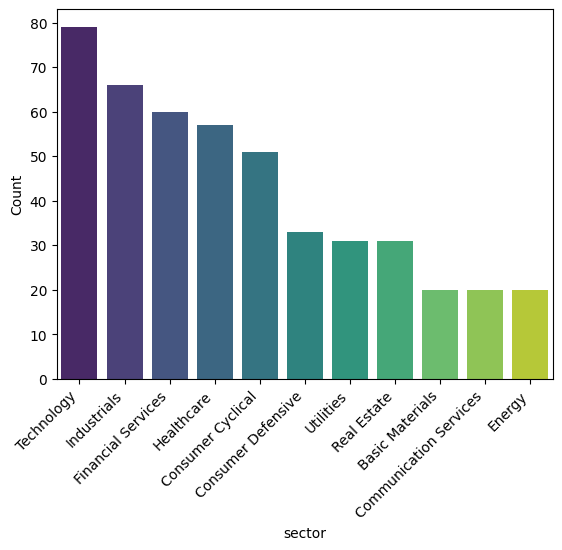

In [45]:
sns.barplot(
    x='sector',
    y='absolute_frequency',
    data=frequency_proportion,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The frequency table gives the count of each sector, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories. Such as:
- Technology: 16% 
- Industrials: 14% 
- Financial Services: 13% 
- Healthcare: 12% 
- Consumer Cyclical: 10% 

<h4 style="color: #D2691E;"> 3.2.2 | Numerical Variables </h4>

In [48]:
definitive['regularmarketprice'].describe()

count     468.000000
mean      223.976323
std       480.295597
min         9.240000
25%        67.035000
50%       122.215000
75%       229.325000
max      7558.050000
Name: regularmarketprice, dtype: float64

**Insights** from Summary Statistics for `regularmarketprice`:

- The average (**mean**) sale price of the stock in the dataset is approximately **$223.98**. This represents the central tendency of the prices.

- The **median** sale price is **$122.21**. Notably, the median is significantly lower than the mean, suggesting that the distribution of stock prices is skewed towards higher values (positively-skewed).

- The **standard deviation**, which measures the variation or spread of prices, is **$480.29**. This large value indicates a high level of variability in stock prices, suggesting that prices are widely dispersed from the mean.

- The **minimum** and **maximum** prices are **$9.24** and **$7558.05**, respectively. This extreme range highlights that the dataset includes stocks with both very low and very high prices.

- The **interquartile range (IQR)**, representing the middle 50% of the prices, lies between $67 (Q1) and $229.32 (Q3). This means that 50% of the stock prices fall within this range, providing a clearer picture of the typical stock price distribution without being influenced by outliers.

**Additional Note:**
The significant difference between the mean and median, combined with the large standard deviation, suggests the presence of outliers or high-value stocks that push the mean upwards. This highlights the importance of focusing on the IQR for understanding the core stock price range.

In [50]:
definitive.regularmarketprice.skew().round(2)

np.float64(10.5)

In [51]:

definitive.regularmarketprice.kurtosis().round(2)

np.float64(139.06)

(0.0, 2100.0)

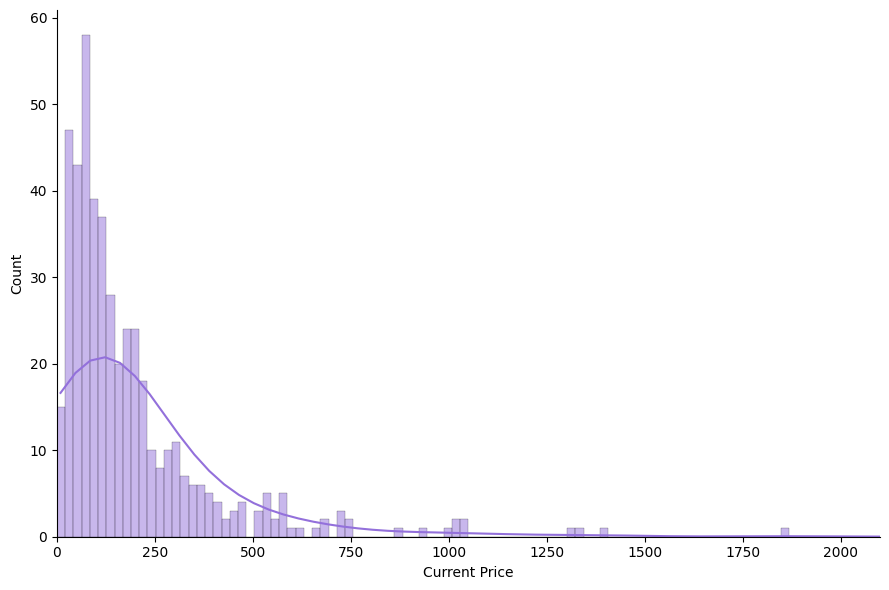

In [52]:
d2 = sns.displot(data=definitive, x='regularmarketprice', kde=True, height=6, aspect=1.5, bins=100, binrange=(0, 2100), color='mediumpurple')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

- Skewness of `regularmarketprice`: \(10.15\)
- Kurtosis of `regularmarketprice`: \(139.06\)

**Insights**:

1. **Skewness**: The positive value of skewness 10.15 for the 'regularmarketprice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of stocks that have higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 139.06 indicates that the 'regularmarketprice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'regularmarketprice' than one would expect in a normally distributed set.

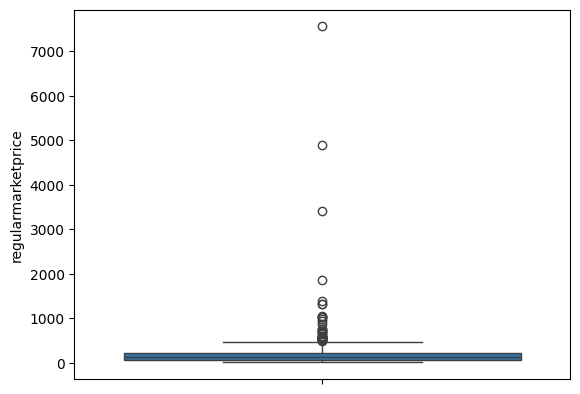

In [54]:
sns.boxplot(data=num.regularmarketprice)
plt.show()

In [55]:
higher_price = definitive.sort_values(by='regularmarketprice', ascending=False)
higher_price.head(4)

,symbol,shortname,address1,city,website,industry,sector,longbusinesssummary,fulltimeemployees,exchangename,fullexchangename,regularmarkettime,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,regularmarketprice
339,NVR,"NVR, Inc.",Plaza America Tower I,Reston,https://www.nvrinc.com,Residential Construction,Consumer Cyclical,"NVR, Inc. operates as a homebuilder in the Uni...",6300.0,NYQ,NYSE,1738962033,9964.77,7227.09,7768.580,7558.05
65,BKNG,Booking Holdings Inc. Common St,800 Connecticut Avenue,Norwalk,https://www.bookingholdings.com,Travel Services,Consumer Cyclical,"Booking Holdings Inc., together with its subsi...",24200.0,NMS,NasdaqGS,1738962001,5337.24,3180.00,5072.700,4887.47
49,AZO,"AutoZone, Inc.",123 South Front Street,Memphis,https://www.autozone.com,Specialty Retail,Consumer Cyclical,"AutoZone, Inc. retails and distributes automot...",75600.0,NYQ,NYSE,1738962002,3484.42,2672.31,3460.145,3420.19
183,FICO,Fair Isaac Corporation,5 West Mendenhall,Bozeman,https://www.fico.com,Software - Application,Technology,Fair Isaac Corporation develops software with ...,3586.0,NYQ,NYSE,1738962010,2402.52,1105.65,1889.080,1858.86


The box plot for 'currentprice' reveals 4 outstanding outliers that significantly exceed the upper range of typical values. These outliers are stock prices that are far above the third quartile (Q3), suggesting that while most prices fall within a relatively normal range, there are a few extreme high-value stocks.

Outliers are detected as values that lie beyond 1.5 times the interquartile range (IQR) above Q3. These extreme values can impact the overall analysis, particularly the mean and standard deviation, causing them to shift upwards.

- NVR, Inc: $7558.05

- Booking Holdings Inc.: $4887.47

- AutoZone Inc. :$3420.19

- Fair Isaac Corporation: $1858.86


<h4 style="color: #D2691E;"> 3.2.3 | Numerical vs Categorical Variables </h4>

In [56]:
num

,fulltimeemployees,regularmarkettime,fiftytwoweekhigh,fiftytwoweeklow,regularmarketdayhigh,regularmarketprice
0,85000.0,1738962002,155.00,75.652,152.900,149.870
1,12000.0,1738962002,92.45,64.940,66.210,65.160
2,114000.0,1738962002,132.50,99.710,129.490,129.070
3,50000.0,1738962002,207.32,153.580,193.860,190.600
4,774000.0,1738962002,398.35,278.690,390.530,385.980
...,...,...,...,...,...,...
463,23000.0,1739198273,146.08,113.260,131.945,131.295
464,35000.0,1739198310,144.96,122.130,144.960,144.305
465,9750.0,1739198246,427.76,243.490,365.430,362.270
466,18000.0,1739198320,133.90,99.930,101.570,100.700


In [57]:
annual_df = definitive = pd.merge (definitive, pivoted_df, on='symbol')

In [58]:
annual_df

,symbol,shortname,address1,city,website,industry,sector,longbusinesssummary,fulltimeemployees,exchangename,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,MMM,3M Company,3M Center,Saint Paul,https://www.3m.com,Conglomerates,Industrials,3M Company provides diversified technology ser...,85000.0,NYQ,...,-0.0576,0.2488,0.3530,-0.1699,-0.0450,0.0072,0.0663,-0.2967,-0.0534,0.4974
1,AOS,A.O. Smith Corporation,11270 West Park Place,Milwaukee,https://www.aosmith.com,Specialty Industrial Machinery,Industrials,A. O. Smith Corporation manufactures and marke...,12000.0,NYQ,...,0.3833,0.2745,0.3037,-0.2964,0.1164,0.1714,0.6194,-0.3022,0.4250,-0.0940
2,ABT,Abbott Laboratories,100 Abbott Park Road,North Chicago,https://www.abbott.com,Medical Devices,Healthcare,"Abbott Laboratories, together with its subsidi...",114000.0,NYQ,...,0.0214,-0.0828,0.4954,0.2529,0.2705,0.2791,0.3098,-0.1971,0.0246,0.0733
3,ABBV,AbbVie Inc.,1 North Waukegan Road,North Chicago,https://www.abbvie.com,Drug Manufacturers - General,Healthcare,"AbbVie Inc. discovers, develops, manufactures,...",50000.0,NYQ,...,-0.0714,0.1290,0.6061,-0.0267,0.0483,0.2628,0.3461,0.2399,-0.0071,0.1427
4,ACN,Accenture plc,1 Grand Canal Square,Dublin,https://www.accenture.com,Information Technology Services,Technology,Accenture plc provides strategy and consulting...,774000.0,NYQ,...,0.2016,0.1735,0.3410,-0.0669,0.5167,0.2629,0.6364,-0.3358,0.3190,0.0623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,XYL,Xylem Inc.,300 Water Street SE,Washington,https://www.xylem.com,Specialty Industrial Machinery,Industrials,"Xylem Inc., together with its subsidiaries, en...",23000.0,NYQ,...,-0.0260,0.3920,0.3914,-0.0082,0.1997,0.2916,0.2144,-0.0418,0.0459,0.1240
462,YUM,"Yum! Brands, Inc.",1441 Gardiner Lane,Louisville,https://www.yum.com,Restaurants,Consumer Cyclical,"Yum! Brands, Inc., together with its subsidiar...",35000.0,NYQ,...,0.0321,0.2488,0.3134,0.1462,0.1200,0.0830,0.3342,-0.0439,0.0485,0.0879
463,ZBRA,Zebra Technologies Corporation,3 Overlook Point,Lincolnshire,https://www.zebra.com,Communication Equipment,Technology,"Zebra Technologies Corporation, together with ...",9750.0,NMS,...,-0.1005,0.2898,0.2035,0.5353,0.6349,0.4831,0.5741,-0.5609,0.0505,0.5274
464,ZBH,"Zimmer Biomet Holdings, Inc.",345 East Main Street,Warsaw,https://www.zimmerbiomet.com,Medical Devices,Healthcare,"Zimmer Biomet Holdings, Inc., together with it...",18000.0,NYQ,...,-0.0810,0.0227,0.1774,-0.1565,0.4745,0.0413,-0.1650,0.0170,-0.0438,-0.1101


In [59]:
annual_df2 = annual_df.groupby('sector')[[ 2014,2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024 ]].agg(['mean']).round(4)
annual_df2

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
sector,,,,,,,,,,,
Basic Materials,0.0450,-0.0535,0.3173,0.2577,-0.1587,0.2191,0.2045,0.4064,-0.0390,0.1012,-0.0004
Communication Services,0.1194,0.1869,0.1833,0.3012,-0.0610,0.3020,0.2336,0.1573,-0.3228,0.2929,0.2850
Consumer Cyclical,0.1299,0.1169,0.1366,0.3211,-0.0530,0.3348,0.1567,0.3073,-0.1737,0.2564,0.1894
Consumer Defensive,0.2103,0.1486,0.0877,0.1395,-0.0404,0.2647,0.1253,0.1704,0.0412,-0.0438,0.0327
Energy,0.0005,-0.2228,0.4140,-0.0030,-0.2209,0.1180,-0.2788,0.6152,0.5079,0.0917,0.1413
Financial Services,0.1261,0.0224,0.2308,0.2426,-0.0926,0.3723,0.0485,0.3732,-0.0791,0.1471,0.3282
Healthcare,0.2889,0.1155,0.0655,0.2728,0.0677,0.3100,0.2993,0.2849,-0.0495,0.0522,0.0041
Industrials,0.1806,-0.0080,0.2841,0.2945,-0.1013,0.4034,0.2171,0.3166,-0.0828,0.2810,0.2886


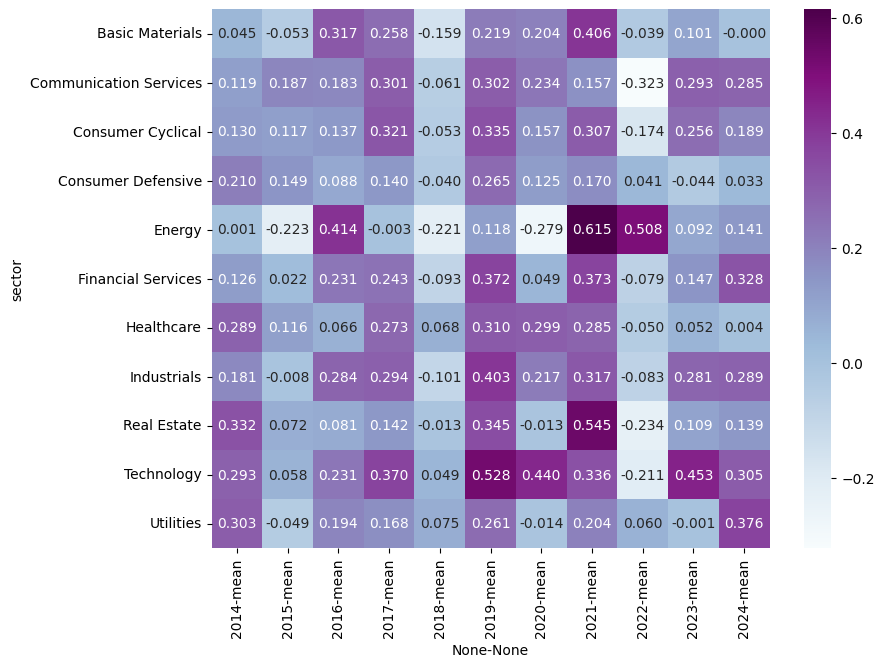

In [60]:
plt.figure(figsize=(9, 7)) 
sns.heatmap(annual_df2, annot=True, cmap="BuPu", fmt=".3f")
plt.show()

### Annual Return sector in S&P 500: 

Calculated the annual return for each sector from 2014 to 2024, analyzing the performance trends across different industries over time.
Observations: 

- The **Energy** sector stands out in 2021 being the highest annual return (0.615). 
- On the other hand, **Technology** sector has the most recurrent annual return over time. 

<h4 style="color: #D2691E;"> 3.2.4 | Continuous vs Continuous Variables </h4>

In [61]:
# Function annual report to add in EDA. 
def annual_return_plot(annual_returns, stock='SP500'):
    # Filter the DataFrame for both the selected symbol (stock) and SP500
    symbols_to_plot = annual_returns[annual_returns["symbol"].isin([stock, 'SP500'])]
    
    # If no data is found for the selected stock or SP500, print a warning and exit the function
    if symbols_to_plot.empty:
        print(f"⚠️ No data available for {stock} or SP500.")
        return
    
    # Pivot the DataFrame to structure it for plotting: 
    # Index will be the 'year', columns will be the 'symbol', and values will be the 'annual_return'
    df_pivot = symbols_to_plot.pivot(index="year", columns="symbol", values="annual_return")
    
    # Define custom colors: SP500 will always be red, and the selected stock will be blue
    colors = {'SP500': '#FF0000', stock: '#0000FF'}

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the annual return data for the selected symbol and SP500 over the years
    for i, symbol in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[symbol], marker='o', label=symbol, color=colors[symbol])

    # Title and labels for the plot
    plt.title(f"Annual Return Comparison: {stock} vs SP500", fontsize=14, fontweight='bold', color="#5F9EA0")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#1E90FF")
    plt.ylabel("Annual Return (%)", fontsize=12, fontweight='bold', color="#4682B4")
    plt.legend(title="Symbol", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()

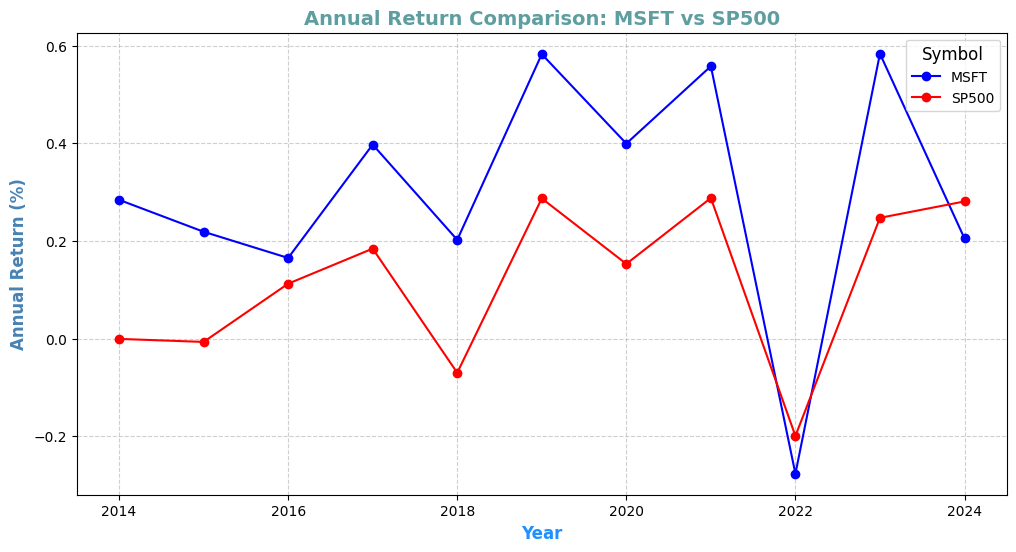

In [62]:
annual_return_plot(annual_returns, 'MSFT')

In [63]:
sorted_df = pivoted_df.sort_values(by=2024, ascending=False)
sorted_df = sorted_df.reset_index()
sorted_df.columns.name = None
sorted_df.head(3)

,symbol,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,PLTR,NaN,NaN,NaN,NaN,NaN,NaN,1.4789,-0.2208,-0.6535,1.6870,3.6043
1,VST,NaN,NaN,0.1662,0.1927,0.2427,0.0480,-0.1129,0.2257,0.0521,0.7787,3.2378
2,NVDA,0.2868,0.6645,2.3292,0.9043,-0.3285,0.7341,1.1802,1.2448,-0.5144,2.4610,1.9580


In [ ]:
########### FINAL ##############

In [ ]:
# Sampling with. 
sample_symbols = ['AMZN','PEP','NKE','SP500']
sample_df = sorted_df[sorted_df['symbol'].isin(sample_symbols)]
# Sampling with. 
sample_symbols1 = ['MSFT','PEP','NKE','SP500','JPM','XOM']
sample_df1 = sorted_df[sorted_df['symbol'].isin(sample_symbols1)]
# Sampling with. 
sample_symbols2 = ['AAPL','MA','WBA','MAR','PEP','SP500','JPM']
sample_df2 = sorted_df[sorted_df['symbol'].isin(sample_symbols2)]

In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return across different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df1.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot line graph directly
plt.figure(figsize=(16, 9))
sampling_df = sample_df2.copy()
# Iterate over each row (symbol) in the DataFrame
for index, row in sampling_df.iterrows():
    plt.plot(sampling_df.columns[1:], row[1:], marker='o', label=row['symbol'])

# Add titles and labels
plt.title("Annualized Return from different years", fontsize=13)
plt.ylabel("Annualized Return", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.legend(title="Symbols", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()

<h3 style="color: #4682B4;"> 3.3 | Checking Distributions</h3>

In [ ]:
color = '#9370DB'

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4682B4;"> 3.4 | Checking our target distribution</h3>

In [ ]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(definitive["currentprice"], color=color, kde=True);

<h3 style="color: #4682B4;">3.5 | Looking for Correlations </h3>

In [ ]:
# Calculating the Pearson correlation coefficient between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'])

In [ ]:
# Calculating the Spearman rank correlation between 'currentprice' and 'revenuegrowth'.
definitive['currentprice'].corr(definitive['revenuegrowth'], method='spearman')

- Pearson Correlation: \(0.0423\)
- Spearman Correlation: \(0.2741\)

**Insights:**

- The **Pearson correlation** of \(0.0423\) suggests a very weak positive linear relationship between currentprice and revenuegrowth. As revenuegrowth increases, currentprice does not show a strong linear increase.
  
- The **Spearman correlation** of \(0.2741\) indicates a weak positive monotonic relationship. This suggests that while higher revenuegrowth tends to correspond with higher currentprice, the relationship is not strongly linear or constant. 

The slightly higher value for Spearman correlation suggests that there might be some non-linear aspects to their relationship or the presence of outliers affecting the Pearson correlation.

In [ ]:
#pearson 
num.corrwith(definitive['currentprice']).sort_values(ascending=False)

In [ ]:
#Spearman
num.corrwith(df['currentprice'], method='spearman').sort_values(ascending=False)[:5]

Variables like `ar_2023`, `marketcap`, `weight`, and `ar_2020` have moderate positive correlations with `currentprice`, suggesting that as these variables increase, the currentprice tends to increase as well, but the relationship is not strong.

In [ ]:
num_corr = num.corr()
num_corr

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

<h3 style="color: #4682B4;">3.6 | Hypothesis Testing </h3>

<h4 style="color: #D2691E;"> 3.6.1 | Hypothesis 1 </h4>

We will use **one-way ANOVA** to determine if there is a statistically significant difference in **revenue growth** based on the **sector**.

#### Define Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in the mean **revenue growth** between these five different sectors:
    - **Technology**
    - **Industrials**
    - **Finance Services** 
    - **Healthcare**
    - **Consumer Cyclical**
- **Alternative Hypothesis (H₁)**: There is a significant difference between these different sectors in the mean **revenue growth**. 

In [ ]:
# Extract revenuegrowth by sector.
tech_df = definitive[definitive['sector'] == 'Technology']['revenuegrowth']
indus_df = definitive[definitive['sector'] == 'Industrials']['revenuegrowth']
fin_df = definitive[definitive['sector'] == 'Financial Services']['revenuegrowth']
health_df = definitive[definitive['sector'] == 'Healthcare']['revenuegrowth']
consumer_df = definitive[definitive['sector'] == 'Consumer Cyclical']['revenuegrowth']

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df, indus_df, fin_df, health_df, consumer_df)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: revenuegrowth has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in revenuegrowth between the sectors.")

**Observations** 

The ANOVA test results indicate that while the mean revenue growth differs across sectors these differences are not statistically significant at the alpha. 

<h4 style="color: #D2691E;"> 3.6.2 | Hypothesis 2 </h4>

**Has price a significant difference depending on the sector?**

- Null Hypothesis (H₀): There is **no** significant difference in the mean **price** between different sectors.
- Alternative Hypothesis (H₁): There is significant difference in the mean **price** between different sectors.

In [ ]:
# Extract currentprice by sector.
tech_df2 = definitive[definitive['sector'] == 'Technology']['currentprice']
indus_df2 = definitive[definitive['sector'] == 'Industrials']['currentprice']
fin_df2 = definitive[definitive['sector'] == 'Financial Services']['currentprice']
health_df2 = definitive[definitive['sector'] == 'Healthcare']['currentprice']
consumer_df2 = definitive[definitive['sector'] == 'Consumer Cyclical']['currentprice']

In [ ]:
print(tech_df2.mean())
print(indus_df2.mean())
print(fin_df2.mean())
print(health_df2.mean())
print(consumer_df2.mean())

In [ ]:
# Perform One-Way ANOVA
f_stat, p_value = st.f_oneway(tech_df2, indus_df2, fin_df2, health_df2, consumer_df2)
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}") 
print()

# Significance level
alpha = 0.05

# Decision-Making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Price has no significant difference between sectors.")
else:
    print("Reject the Null Hypothesis: There is a significant difference in price between the sectors.")

**Observations** 

The ANOVA test indicates that while the mean current prices differ across the five sectors these differences are not statistically significant. The data doesn't provide strong enough evidence to suggest that sector has a meaningful effect on the differences in current prices. 

In [ ]:
definitive

In [ ]:
yahoo_df = pd.read_csv("yahoo_api.csv")

In [ ]:
yahoo_df

In [ ]:
df1 = pd.merge(definitive, yahoo_df, on='symbol')

In [ ]:
# If I run inner join we do have left 178 stocks. 
df1

In [ ]:
df2 = pd.merge(definitive, yahoo_df, on='symbol', how='outer')

In [ ]:
# If I do have outer join I do have left 825 stocks. 
df2

In [ ]:
df2.sample(10)

In [ ]:
# Selecting categorical columns. 
cat1 = df2.select_dtypes(exclude='number')
cat1.head(5)

In [ ]:
# Selecting categorical columns. 
num1 = df2.select_dtypes(include='number')
num1.head(5)

In [ ]:
num_corr2 = num1.corr()
num_corr2

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr2, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

In [ ]:
pd.set_option('display.max_columns', None)